In [24]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import time

# Load and concatenate data files
files = ['Mutated_Genes (1).csv', 'Mutated_Genes (2).csv', 'Mutated_Genes.csv']
data_frames = [pd.read_csv(file) for file in files]
combined_data = pd.concat(data_frames)
combined_data['Freq'] = combined_data['Freq'].str.rstrip('%').astype(float)

# Select the top 20 most mutated genes by frequency
top_genes = combined_data.nlargest(20, 'Freq')

# Create a directed graph
G = nx.DiGraph()
for index, row in top_genes.iterrows():
    G.add_node(row['Gene'], frequency=row['Freq'])

# Sort genes by frequency in descending order and add edges accordingly
sorted_genes = top_genes.sort_values('Freq', ascending=False)
for i in range(len(sorted_genes) - 1):
    G.add_edge(sorted_genes.iloc[i]['Gene'], sorted_genes.iloc[i + 1]['Gene'], weight=sorted_genes.iloc[i]['Freq'])

# Perform topological sort if the graph is acyclic
if nx.is_directed_acyclic_graph(G):
    start_time = time.time()
    sorted_genes_list = list(nx.topological_sort(G))
    end_time = time.time()

    # Print the sorted genes
    print("Genes sorted by mutation frequency in descending order:")
    for gene in sorted_genes_list:
        print(gene)

    # Calculate and print the execution time
    execution_time = end_time - start_time
    print(f"Execution Time: {execution_time:.4f} seconds")
    print(f"Time Complexity: O(V + E) where V is the number of vertices and E is the number of edges.")
else:
    print("The graph contains a cycle and cannot be topologically sorted.")










The graph contains a cycle and cannot be topologically sorted.


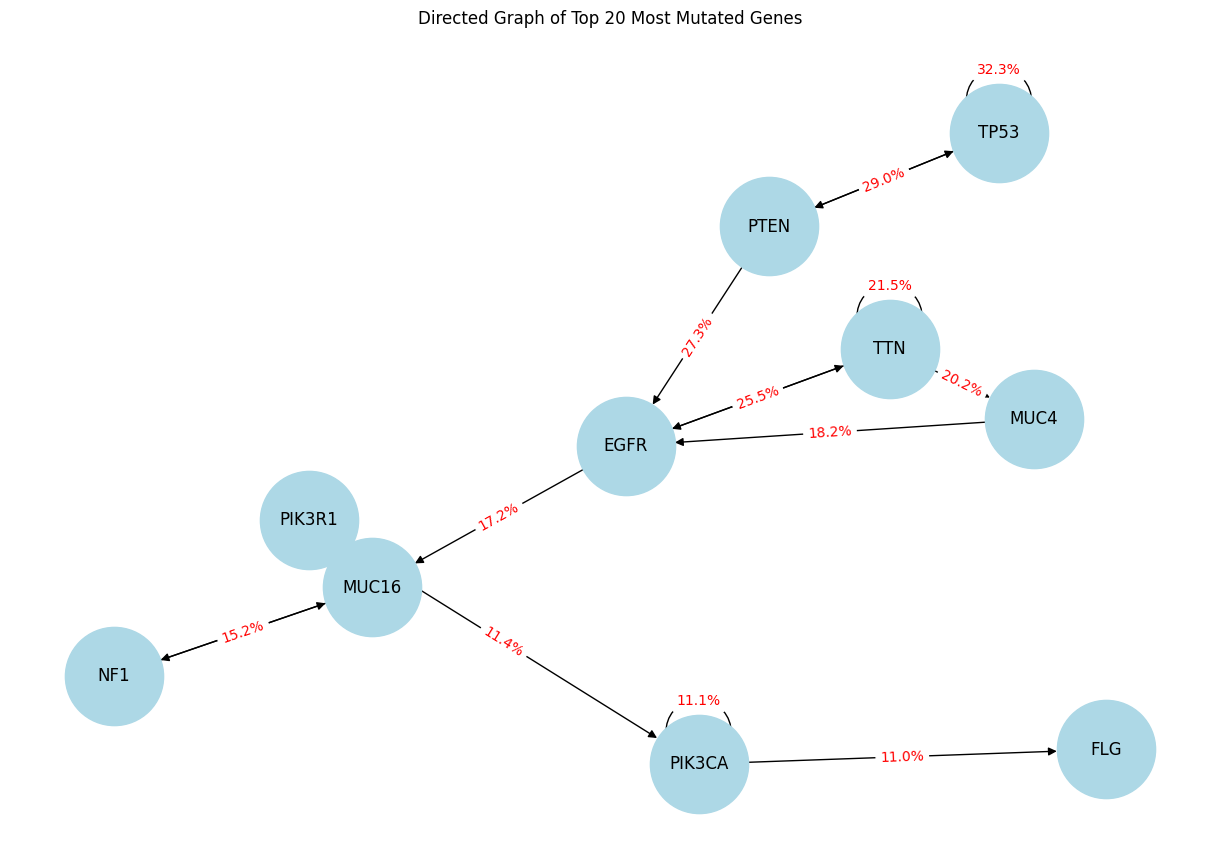

In [20]:
# Visualization
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=2)  # More space between nodes
nx.draw(G, pos, with_labels=True, labels={node: node for node in G.nodes()}, node_color='lightblue', node_size=5000, font_size=12, arrowstyle='-|>', arrowsize=12)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={key: f'{value}%' for key, value in edge_labels.items()}, font_color='red')
plt.title("Directed Graph of Top 20 Most Mutated Genes")
plt.axis('off')
plt.show()


Cannot perform topological sort: the graph contains a cycle.


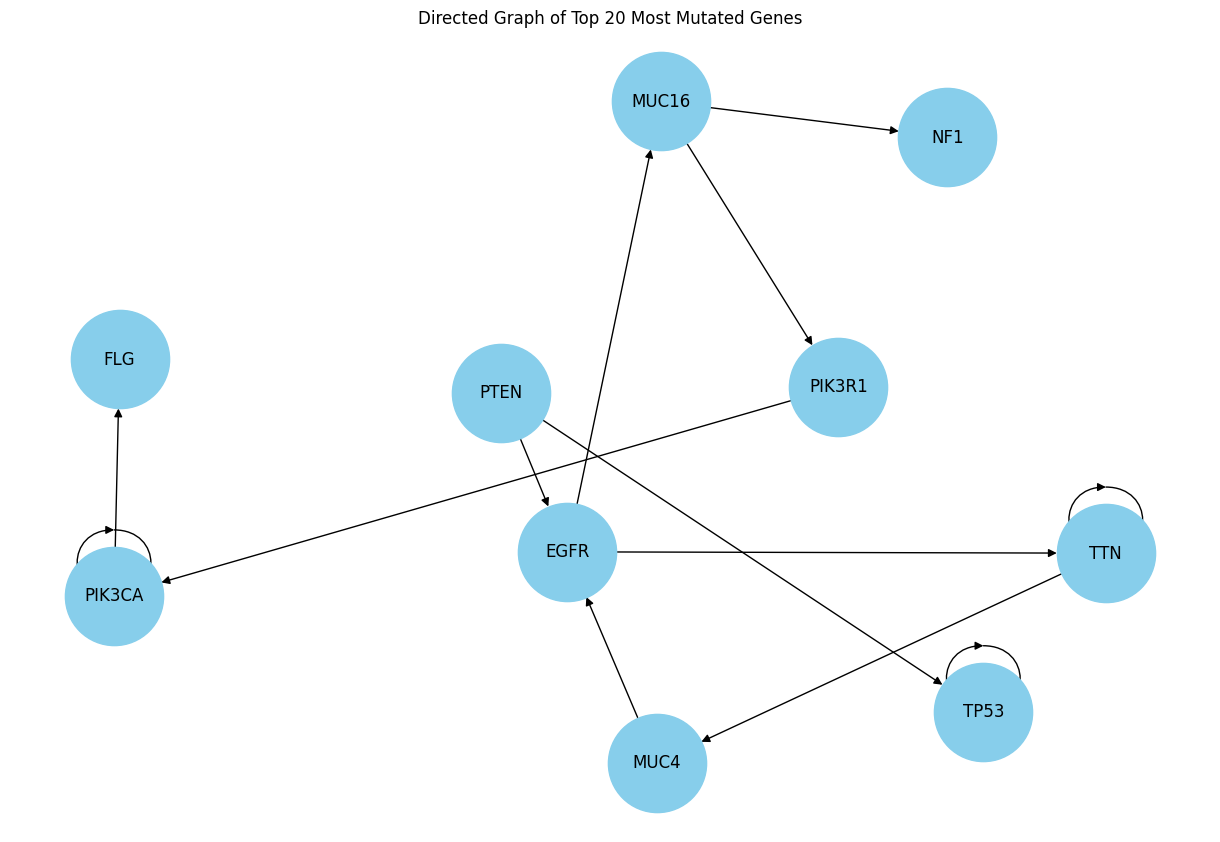

In [12]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import time

# Load and concatenate data files
files = ['Mutated_Genes (1).csv', 'Mutated_Genes (2).csv', 'Mutated_Genes.csv']
data_frames = [pd.read_csv(file) for file in files]
combined_data = pd.concat(data_frames)
combined_data['Freq'] = combined_data['Freq'].str.rstrip('%').astype(float)

# Select the top 20 most mutated genes
top_genes = combined_data.nlargest(20, 'Freq')

# Create a directed graph
G = nx.DiGraph()
top_genes.apply(lambda row: G.add_node(row['Gene'], frequency=row['Freq']), axis=1)

# Add edges in a way that avoids cycles
for i in range(len(top_genes) - 1):
    if not G.has_edge(top_genes.iloc[i + 1]['Gene'], top_genes.iloc[i]['Gene']):
        G.add_edge(top_genes.iloc[i]['Gene'], top_genes.iloc[i + 1]['Gene'])

# Check for cycles before attempting topological sort
if nx.is_directed_acyclic_graph(G):
    start_time = time.time()
    sorted_genes = list(nx.topological_sort(G))
    end_time = time.time()
    print("Topologically sorted genes:", sorted_genes)
    print("Execution Time: {:.4f} seconds".format(end_time - start_time))
else:
    print("Cannot perform topological sort: the graph contains a cycle.")

# Visualization
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=2)  # More space between nodes
nx.draw(G, pos, with_labels=True, node_size=5000, node_color='skyblue', font_size=12, arrowstyle='-|>', arrowsize=12)
plt.title("Directed Graph of Top 20 Most Mutated Genes")
plt.show()
